In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [2]:
df = pd.read_csv('users_behavior.csv')

In [3]:
print(df.head())
print(df.info())
print(df.describe())
print(df.isna().sum())
print(df['is_ultra'].value_counts())

   calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
3  106.0   745.53      81.0   8437.39         1
4   66.0   418.74       1.0  14502.75         0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None
             calls      minutes     messages       mb_used     is_ultra
count  3214.000000  3214.000000  3214.000000   3214.000000  3214.000000
mean     63.038892   438.208787    38.281269  17207.673836     0.306472
std      33.236368   234.569872    36.148326   7570.968246  

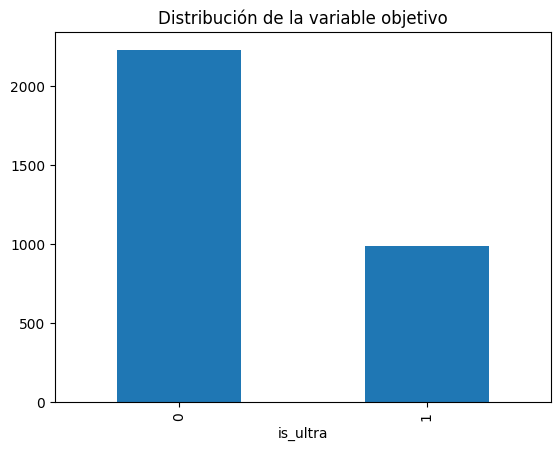

In [4]:
df['is_ultra'].value_counts().plot(kind='bar')
plt.title('Distribución de la variable objetivo')
plt.show()

Observamos que no debemos hacer procesamiento de datos, sin embargo, al final denotamos que tenemos un data set desbalanceado, con un balance aproximado de (70-30)

Ahora proceddemos a dividir nuestras caracteristicas y el target

In [5]:
x = df[['calls', 'minutes', 'messages', 'mb_used']]
y = df['is_ultra']

Segmentamos los datos para Train y Test y este estara dividido (70-30)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Se que decision tree no es bueno para datos desbalanceaods, sin embargo quiero realizarlo como prueba

In [7]:
modelo = DecisionTreeClassifier(max_depth=50, random_state=42) 
modelo.fit(X_train, y_train)

# Evaluamos el modelo
y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"🌳 Precisión del modelo: {accuracy:.2f}")

🌳 Precisión del modelo: 0.72


Ahora is utilizaremos random forest que es mejor para datos desbalanceados

In [8]:
modelo_class = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_class.fit(X_train, y_train)
y_pred = modelo_class.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f"🔵 Precisión del modelo de Clasificación: {accuracy:.2f}")

🔵 Precisión del modelo de Clasificación: 0.80


In [10]:
print("📊 Reporte de clasificación:")
print(classification_report(y_test, y_pred))

📊 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.92      0.87       660
           1       0.77      0.54      0.63       305

    accuracy                           0.80       965
   macro avg       0.79      0.73      0.75       965
weighted avg       0.80      0.80      0.79       965



Al obtener un f1-score weighted que es el mas real en situaciones de datos desbalanceados y este al ser mayor a 0.75 Pienso que tenemos un buen modelo.